C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20532\3220499265.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = merged_df.resample('M')['Total_Trans_Amt'].sum()


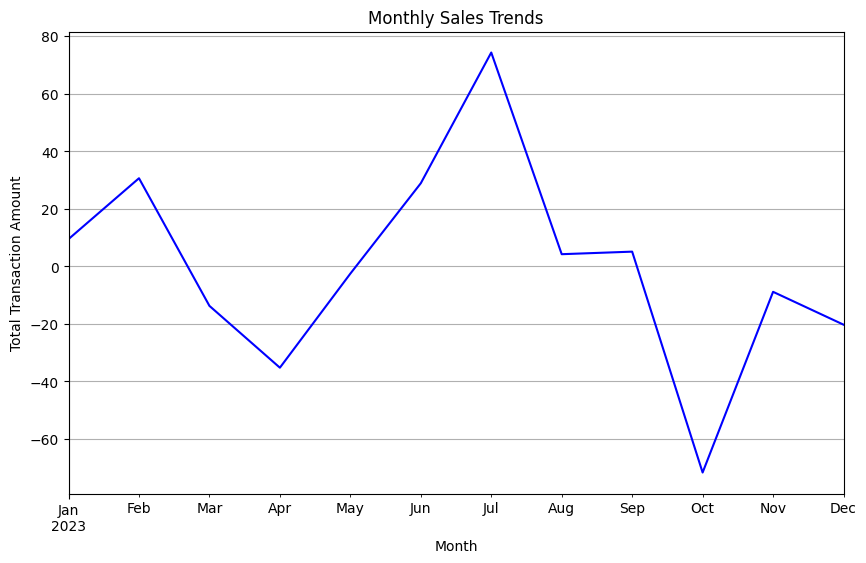

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the processed data
merged_df = pd.read_csv(r'E:\Python\Credit_Card_Financial_PBI\data\processed\merged_data.csv')

# Convert 'Week_Start_Date' to datetime format 
merged_df['Week_Start_Date'] = pd.to_datetime(merged_df['Week_Start_Date'], format='%d-%m-%Y')

# Set 'Week_Start_Date' as the index
merged_df.set_index('Week_Start_Date', inplace=True)

# Resample the data by month and sum the 'Total_Trans_Amt'
monthly_sales = merged_df.resample('M')['Total_Trans_Amt'].sum()

# Plot the monthly sales trends
plt.figure(figsize=(10, 6))
monthly_sales.plot(title='Monthly Sales Trends', color='blue')
plt.xlabel('Month')
plt.ylabel('Total Transaction Amount')
plt.grid(True)

# Save the plot 
plt.savefig(r'E:\Python\Credit_Card_Financial_PBI\plots\monthly_sales_trends.png')  # Save the plot
plt.show()




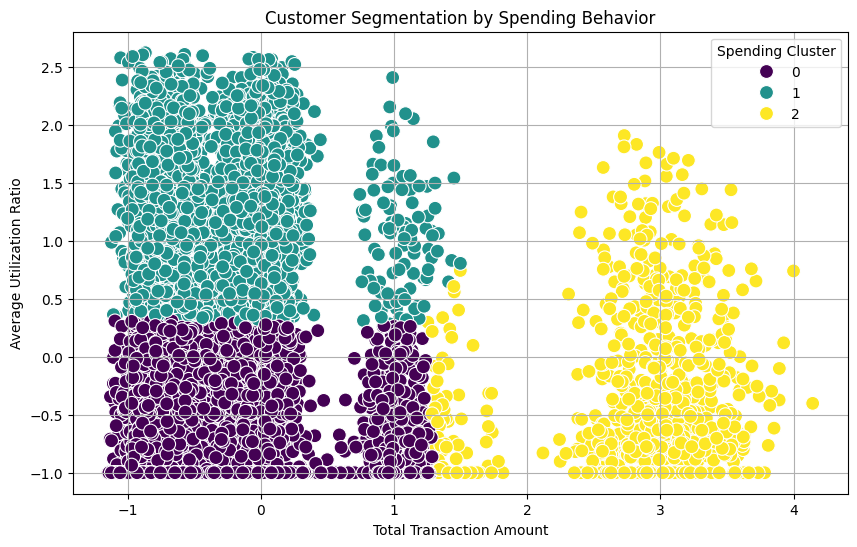

In [10]:
from sklearn.cluster import KMeans
import seaborn as sns

# Select features for clustering
X = merged_df[['Total_Trans_Amt', 'Avg_Utilization_Ratio']]

# Initialize K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model and predict clusters
merged_df['Spending_Cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Total_Trans_Amt', 
    y='Avg_Utilization_Ratio', 
    hue='Spending_Cluster', 
    data=merged_df, 
    palette='viridis', 
    s=100
)
plt.title('Customer Segmentation by Spending Behavior')
plt.xlabel('Total Transaction Amount')
plt.ylabel('Average Utilization Ratio')
plt.grid(True)
plt.legend(title='Spending Cluster')
plt.savefig(r'E:\Python\Credit_Card_Financial_PBI\plots\Customer_Segmentation_by_Spending_Behavior.png')  # Save the plot
plt.show()

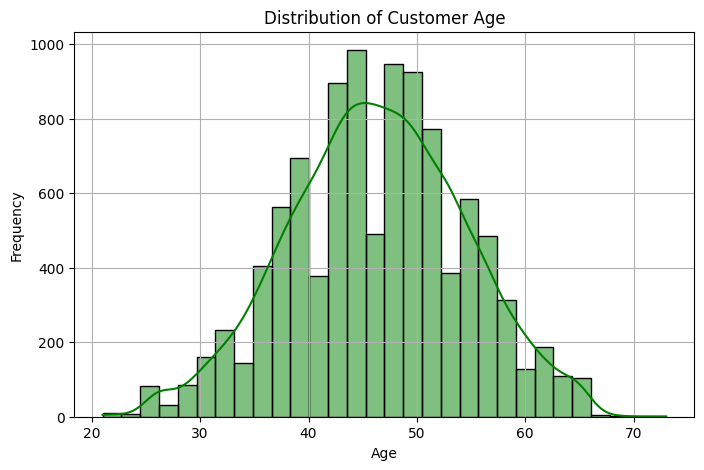

In [18]:
# Plot the distribution of customer age
plt.figure(figsize=(8, 5))
sns.histplot(merged_df['Customer_Age'], bins=30, kde=True, color='green')
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig(r'E:\Python\Credit_Card_Financial_PBI\plots\Distribution_of_Customer_Age.png')  # Save the plot
plt.show()

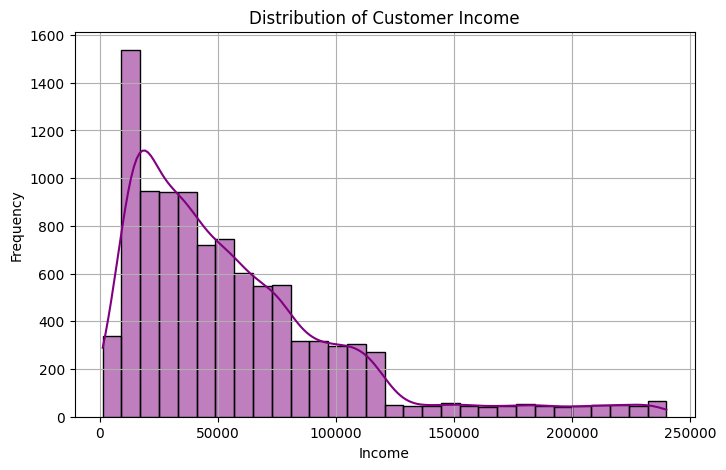

In [20]:
# Plot the distribution of customer income
plt.figure(figsize=(8, 5))
sns.histplot(merged_df['Income'], bins=30, kde=True, color='purple')
plt.title('Distribution of Customer Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig(r'E:\Python\Credit_Card_Financial_PBI\plots\Distribution_of_Customer_Income.png')  # Save the plot
plt.show()

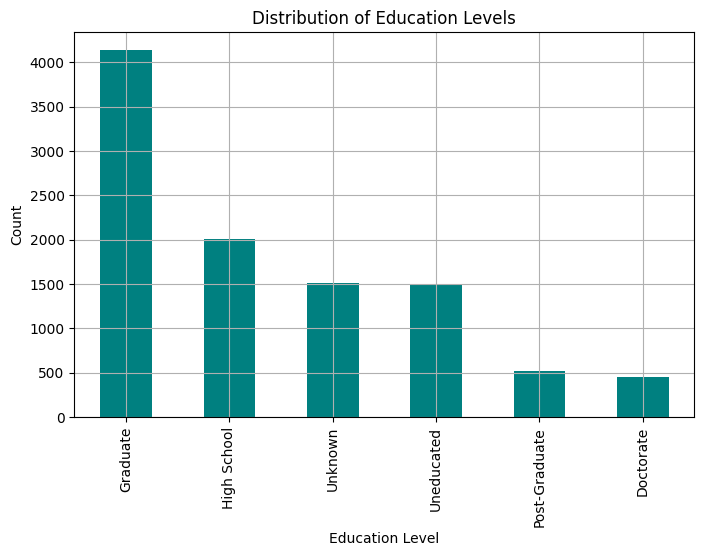

In [21]:
# Plot the distribution of education levels
plt.figure(figsize=(8, 5))
merged_df['Education_Level'].value_counts().plot(kind='bar', color='teal')
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.grid(True)
plt.savefig(r'E:\Python\Credit_Card_Financial_PBI\plots\Distribution_of_Customer_Education_Level.png')  # Save the plot
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20532\3398216120.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delinquency_by_income = merged_df.groupby('Income_Bin')['Delinquent_Acc'].mean()


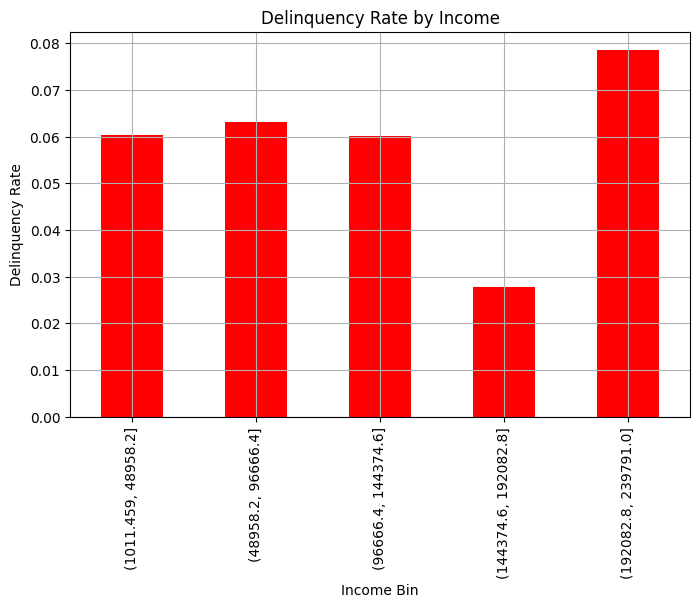

In [23]:
# Group by income bins and calculate delinquency rate
merged_df['Income_Bin'] = pd.cut(merged_df['Income'], bins=5)
delinquency_by_income = merged_df.groupby('Income_Bin')['Delinquent_Acc'].mean()

# Plot delinquency rate by income
plt.figure(figsize=(8, 5))
delinquency_by_income.plot(kind='bar', color='red')
plt.title('Delinquency Rate by Income')
plt.xlabel('Income Bin')
plt.ylabel('Delinquency Rate')
plt.grid(True)
plt.savefig(r'E:\Python\Credit_Card_Financial_PBI\plots\Delinquency_Rate_By_Income.png')  # Save the plot
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20532\2656062968.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delinquency_by_utilization = merged_df.groupby('Utilization_Bin')['Delinquent_Acc'].mean()


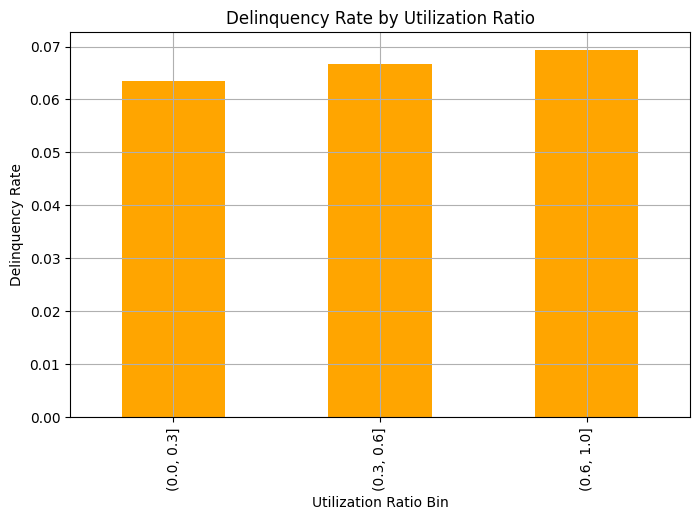

In [25]:
# Group by utilization ratio bins and calculate delinquency rate
merged_df['Utilization_Bin'] = pd.cut(merged_df['Avg_Utilization_Ratio'], bins=[0, 0.3, 0.6, 1])
delinquency_by_utilization = merged_df.groupby('Utilization_Bin')['Delinquent_Acc'].mean()

# Plot delinquency rate by utilization ratio
plt.figure(figsize=(8, 5))
delinquency_by_utilization.plot(kind='bar', color='orange')
plt.title('Delinquency Rate by Utilization Ratio')
plt.xlabel('Utilization Ratio Bin')
plt.ylabel('Delinquency Rate')
plt.grid(True)
plt.savefig(r'E:\Python\Credit_Card_Financial_PBI\plots\Delinquency_Rate_By_Utilization_Rate.png')  # Save the plot
plt.show()

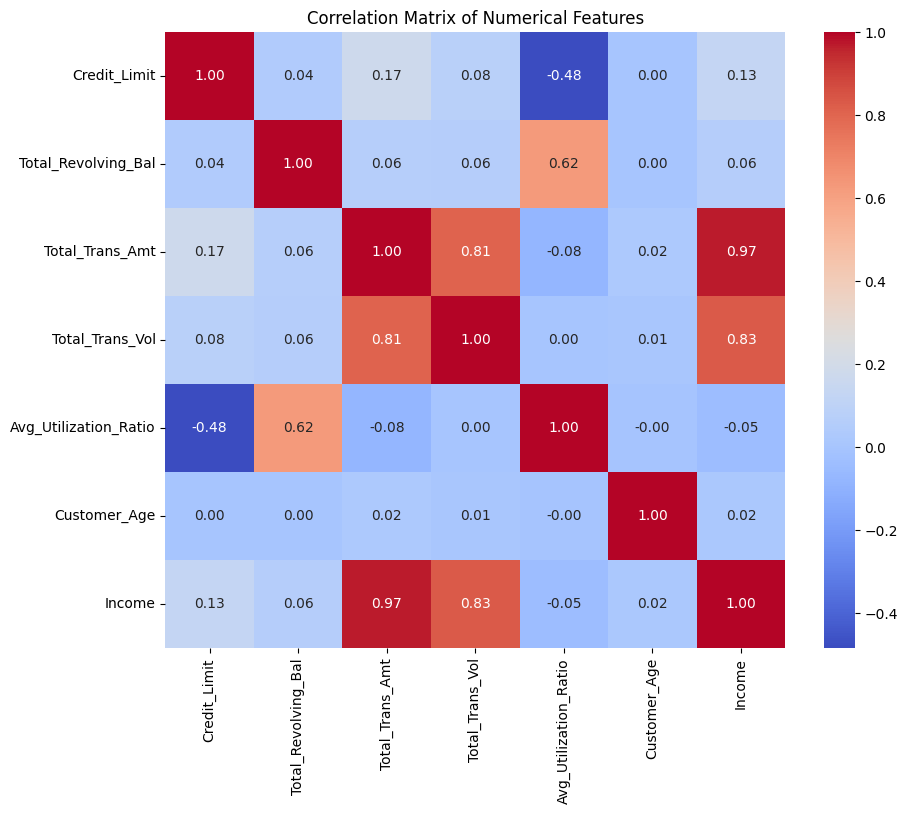

In [29]:
# Select numerical features for correlation analysis
numerical_features = ['Credit_Limit', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Trans_Vol', 'Avg_Utilization_Ratio', 'Customer_Age', 'Income']

# Calculate the correlation matrix
correlation_matrix = merged_df[numerical_features].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.savefig(r'E:\Python\Credit_Card_Financial_PBI\plots\Correlation_Matrix_OF_Numerical_Features.png')  # Save the plot
plt.show()